In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv("Score.csv")
df.head()


,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [33]:
# Cell 3 - Basic EDA
print("Missing values:\n", df.isnull().sum())
print("\nTarget distribution:\n", df["Credit_Score"].value_counts())


Missing values:
 Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

Target distribution:
 Credit_Score
Standard    53149
Poor        28988
Good        17823
Name: count, dtype: int64


In [34]:
# Cell 4 - Preprocess
df_clean = df.dropna()

X = df_clean.drop("Credit_Score", axis=1)
y = df_clean["Credit_Score"]

cat_cols = X.select_dtypes(include="object").columns.tolist()

encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print("Final data shapes:", X.shape, y.shape)


Final data shapes: (99960, 20) (99960,)


In [36]:
# Cell 5 - Splits
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (79968, 20) Val: (9996, 20) Test: (9996, 20)


In [37]:
# Cell 6 - Train SAMME.R equivalent
# Real boosting happens automatically because tree supports predict_proba()
from sklearn.tree import DecisionTreeClassifier


ada_r = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.8,
    algorithm="SAMME",
    random_state=42
)
ada_r.fit(X_train, y_train)


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.8
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


SAMME.R-equivalent Accuracy: 0.6452581032412965

Classification Report:
               precision    recall  f1-score   support

        Good       0.58      0.56      0.57      1783
        Poor       0.64      0.55      0.59      2898
    Standard       0.67      0.73      0.70      5315

    accuracy                           0.65      9996
   macro avg       0.63      0.61      0.62      9996
weighted avg       0.64      0.65      0.64      9996



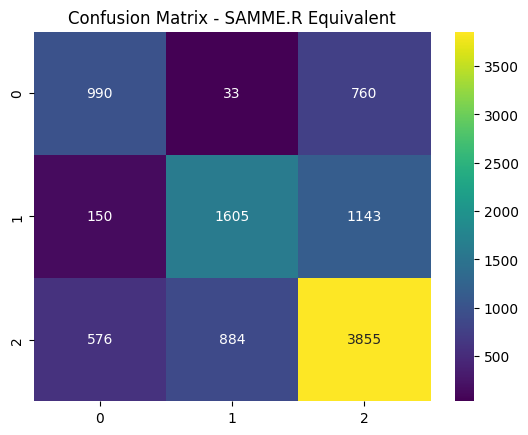

In [38]:
# Cell 7 - Evaluate SAMME.R equivalent
import seaborn as sns
import matplotlib.pyplot as plt
pred_r = ada_r.predict(X_test)
acc_r = accuracy_score(y_test, pred_r)

print("SAMME.R-equivalent Accuracy:", acc_r)
print("\nClassification Report:\n", classification_report(y_test, pred_r))

cm_r = confusion_matrix(y_test, pred_r)
sns.heatmap(cm_r, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix - SAMME.R Equivalent")
plt.show()


In [40]:
# Cell 8 - Train discrete SAMME
ada_samme = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.8,
    algorithm="SAMME",
    random_state=42
)
ada_samme.fit(X_train, y_train)


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.8
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


SAMME Accuracy: 0.6452581032412965

Classification Report:
               precision    recall  f1-score   support

        Good       0.58      0.56      0.57      1783
        Poor       0.64      0.55      0.59      2898
    Standard       0.67      0.73      0.70      5315

    accuracy                           0.65      9996
   macro avg       0.63      0.61      0.62      9996
weighted avg       0.64      0.65      0.64      9996



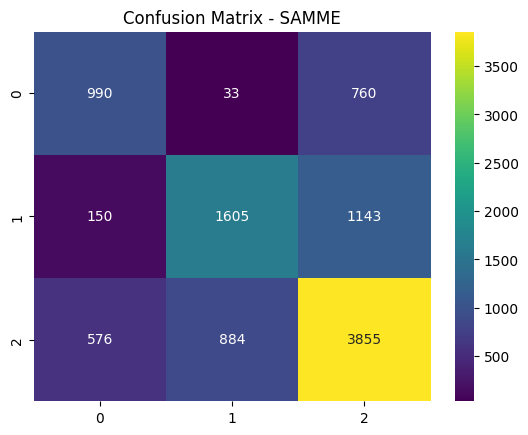

In [41]:
# Cell 9 - Evaluate SAMME
pred_s = ada_samme.predict(X_test)
acc_s = accuracy_score(y_test, pred_s)

print("SAMME Accuracy:", acc_s)
print("\nClassification Report:\n", classification_report(y_test, pred_s))

cm_s = confusion_matrix(y_test, pred_s)
sns.heatmap(cm_s, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix - SAMME")
plt.show()


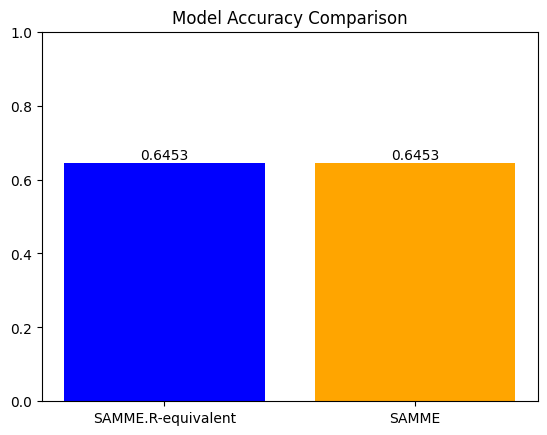

SAMME.R-equivalent Accuracy: 0.6452581032412965
SAMME Accuracy: 0.6452581032412965


In [42]:
# Cell 10 - Compare accuracies
plt.bar(["SAMME.R-equivalent", "SAMME"], [acc_r, acc_s], color=["blue","orange"])
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
for i, v in enumerate([acc_r, acc_s]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center")
plt.show()

print("SAMME.R-equivalent Accuracy:", acc_r)
print("SAMME Accuracy:", acc_s)


In [43]:
# Cell 11 - Detailed comparison tables
rep_r = pd.DataFrame(classification_report(y_test, pred_r, output_dict=True)).T
rep_s = pd.DataFrame(classification_report(y_test, pred_s, output_dict=True)).T

print("=== SAMME.R Equivalent ===")
display(rep_r)

print("=== SAMME (Discrete) ===")
display(rep_s)


=== SAMME.R Equivalent ===


,precision,recall,f1-score,support
Good,0.576923,0.555244,0.565876,1783.000000
Poor,0.636400,0.553830,0.592251,2898.000000
Standard,0.669503,0.725306,0.696288,5315.000000
accuracy,0.645258,0.645258,0.645258,0.645258
macro avg,0.627609,0.611460,0.618138,9996.000000
weighted avg,0.643392,0.645258,0.642864,9996.000000


=== SAMME (Discrete) ===


,precision,recall,f1-score,support
Good,0.576923,0.555244,0.565876,1783.000000
Poor,0.636400,0.553830,0.592251,2898.000000
Standard,0.669503,0.725306,0.696288,5315.000000
accuracy,0.645258,0.645258,0.645258,0.645258
macro avg,0.627609,0.611460,0.618138,9996.000000
weighted avg,0.643392,0.645258,0.642864,9996.000000
